# Exploratory data analysis

In this notebook I am going to analyse and visualize data, make some hypotesis about choosing system algorithm approach.

## Reading data

In [2]:
import pandas as pd
import sys
import os
sys.path.append("../")
from definitions import ROOT_DIR
import numpy as np

In [3]:
data_folder = os.path.join(ROOT_DIR, 'data/interim')

In [4]:
data = pd.read_csv(os.path.join(data_folder, 'data.csv'))
films = pd.read_csv(os.path.join(data_folder, 'films.csv'))
user = pd.read_csv(os.path.join(data_folder, 'user.csv'))

In [5]:
data.head(3)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [6]:
films.head(3)

,movie_id,movie title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
user.head(3)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


## Visualizing data

Distribution of ranks per user, ditribution of films ranked

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
plot_path = os.path.join(ROOT_DIR, 'reports/figures')

### User ranks count per user

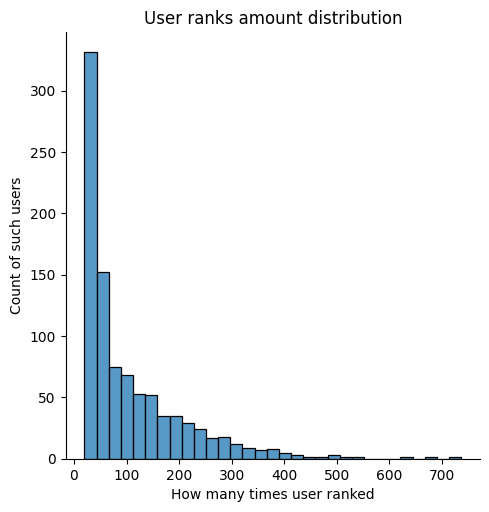

In [10]:
ax = sns.displot(data['user_id'].value_counts())
ax.set(xlabel='How many times user ranked', ylabel='Count of such users')
plt.title('User ranks amount distribution')
plt.savefig(os.path.join(plot_path, 'user_rank_distr.png'))

In [11]:
data['user_id'].value_counts().describe()

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: user_id, dtype: float64

### Films ranks amount per film

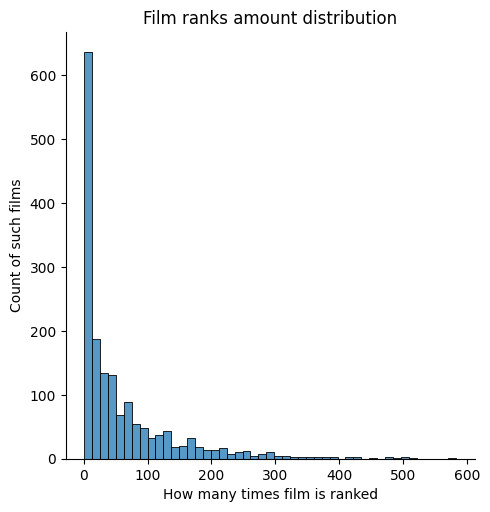

In [12]:
ax = sns.displot(data['item_id'].value_counts())
ax.set(xlabel='How many times film is ranked', ylabel='Count of such films')
plt.title('Film ranks amount distribution')
plt.savefig(os.path.join(plot_path, 'film_rank_amount_distr.png'))

In [13]:
data['item_id'].value_counts().describe()

count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: item_id, dtype: float64

In [17]:
vc = data['item_id'].value_counts().value_counts()
vc[1], vc[2], vc[3], vc[4]

(141, 68, 60, 64)

In [18]:
vc[:10]

1     141
2      68
4      64
3      60
5      51
7      44
6      39
9      33
10     33
8      30
Name: item_id, dtype: int64

## Distribution of ranks values

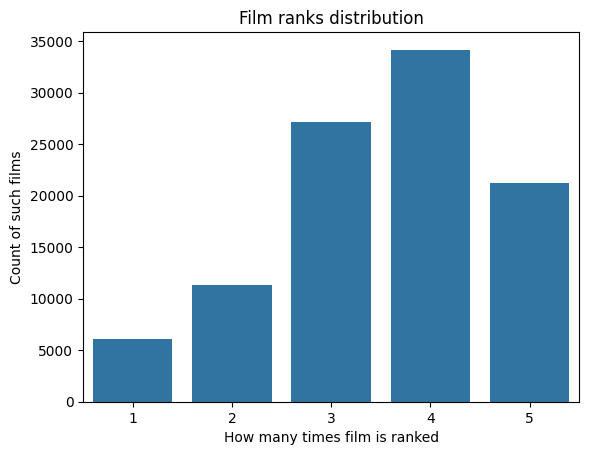

In [184]:
ax = sns.barplot(data['rating'].value_counts())
ax.set(xlabel='How many times film is ranked', ylabel='Count of such films')
plt.title('Film ranks distribution')
plt.savefig(os.path.join(plot_path, 'film_rank_distr.png'))

## Distribution of films categories

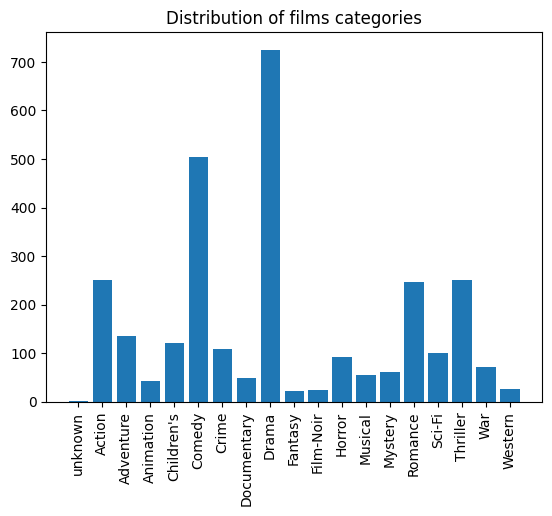

In [185]:
category_sums = [films.iloc[:, i].sum() for i in range(4, 4+19)]
category_labels = films.columns[4:]

plt.xticks(rotation='vertical')
plt.bar(category_labels, category_sums)
plt.title('Distribution of films categories')
plt.savefig(os.path.join(plot_path, 'film_categories_distr.png'))

### User age distribution

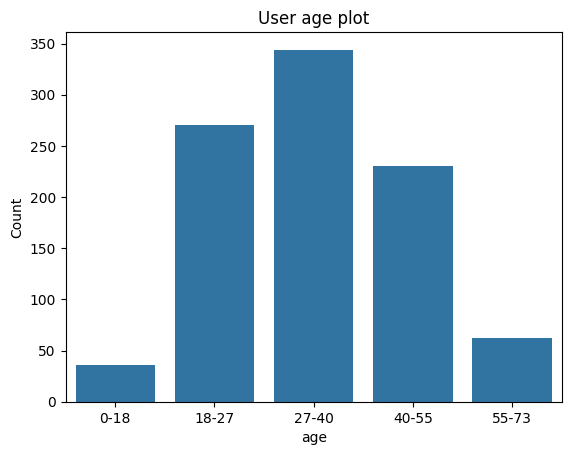

In [186]:
bins = [0, 18, 27, 40, 55, 73]
labels = ['0-18', '18-27', '27-40', '40-55', '55-73']

counts = pd.cut(user['age'], bins=bins, labels=labels, right=False) \
                    .value_counts().sort_index().reindex(labels, fill_value=0)

ax = sns.barplot(counts)
ax.set(xlabel='age', ylabel='Count')
plt.title('User age plot')
plt.savefig(os.path.join(plot_path, 'user_age_distr.png'))

### User gender distribution

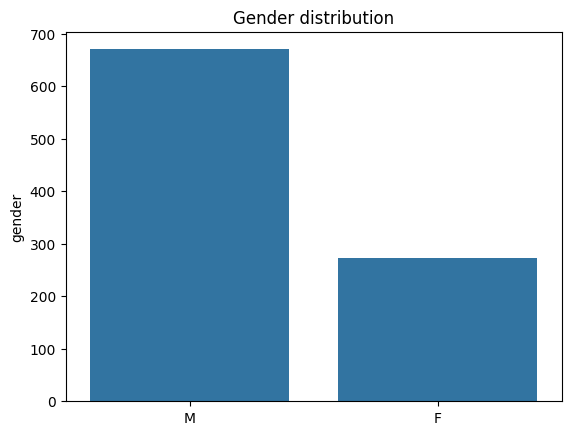

In [187]:
ax = sns.barplot(user['gender'].value_counts())
plt.title('Gender distribution')
plt.savefig(os.path.join(plot_path, 'user_gender_distr.png'))

### User occupation distribution

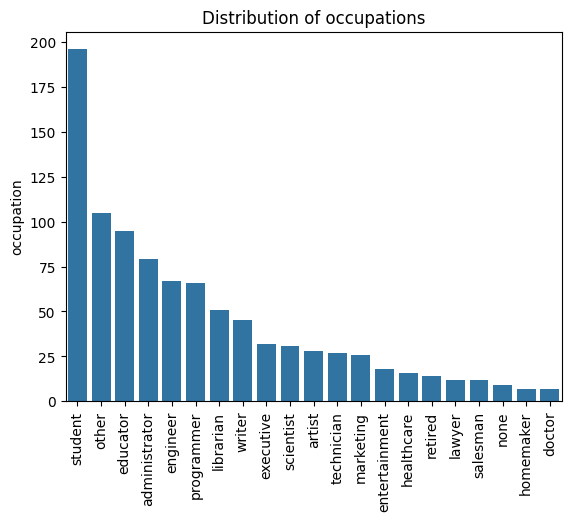

In [188]:
plt.xticks(rotation='vertical')
ax = sns.barplot(user['occupation'].value_counts())
plt.title('Distribution of occupations')
plt.savefig(os.path.join(plot_path, 'user_occupations_distr.png'))

### Zip codes

In [189]:
user['zip_code'].nunique()

795

## Making a hypotezis

There are valuable features either for user profile (occupation, age, etc) and item profile (big set of categories), so I will try to use a **hybrid Collaborative Filtering** approach using **both Item-Item and User-User** approaches.